# Chapter 13
## Linear models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, SGDRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFECV

## Linear regression

In [2]:
california = fetch_california_housing()
california

X = pd.DataFrame(scale(california.data), columns=california.feature_names)
y = california.target

display(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=42)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


In [3]:
lm = LinearRegression()
lm.fit(X_train, y_train)

[print(feat+": "+str(round(coef, 1))) for feat, coef in zip(california.feature_names, lm.coef_)]
print(f"\ntrain R2:\t{lm.score(X_train, y_train):.3}")
print(f"test R2:\t{lm.score(X_test, y_test):.3}")

MedInc: 0.9
HouseAge: 0.1
AveRooms: -0.3
AveBedrms: 0.4
Population: -0.0
AveOccup: -0.0
Latitude: -0.9
Longitude: -0.9

train R2:	0.613
test R2:	0.576


### Qualitative features

In [4]:
lbl = LabelEncoder()
enc = OneHotEncoder(sparse=False)
qualitative = ['red', 'red', 'green', 'blue', 'red', 'blue', 'blue', 'green']

ordinal = lbl.fit_transform(qualitative).reshape(-1, 1)
one_hot = enc.fit_transform(np.asarray(qualitative).reshape(-1, 1))

for i, j, k in zip(qualitative, ordinal, one_hot):
    print(f"{i}\t{j}\t{k}")

red	[2]	[0. 0. 1.]
red	[2]	[0. 0. 1.]
green	[1]	[0. 1. 0.]
blue	[0]	[1. 0. 0.]
red	[2]	[0. 0. 1.]
blue	[0]	[1. 0. 0.]
blue	[0]	[1. 0. 0.]
green	[1]	[0. 1. 0.]


### Polynomial features

In [5]:
pf = PolynomialFeatures(degree=2)
poly_X_train, poly_X_test = pf.fit_transform(X_train), pf.fit_transform(X_test)

lm = LinearRegression()
lm.fit(poly_X_train, y_train)

print(f"train R2:\t{lm.score(poly_X_train, y_train):.3}")
print(f"test R2:\t{lm.score(poly_X_test, y_test):.3}")

train R2:	0.685
test R2:	0.646


## Classification
Regression cannot solve classification

In [6]:
y = np.concatenate([np.zeros(4), np.ones(4)])
X = np.arange(1, 9).reshape(-1, 1)

lm = LinearRegression()
lm.fit(X, y)
preds = lm.predict(X)

for y_true, y_pred in zip(y, preds):
    print(f"{y_true} -> {y_pred:+.3}")

0.0 -> -0.167
0.0 -> +0.0238
0.0 -> +0.214
0.0 -> +0.405
1.0 -> +0.595
1.0 -> +0.786
1.0 -> +0.976
1.0 -> +1.17


In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train >= 3.772)

in_sample_acc = accuracy_score(y_train >= 3.772, lr.predict(X_train))
out_sample_acc = accuracy_score(y_test >= 3.772, lr.predict(X_test))

print(f"In-sample accuracy: {in_sample_acc:.3}")
print(f"Out-sample accuracy: {out_sample_acc:.3}\n")
for var, coef in zip(X_train.columns, lr.coef_[0]):
    print(f"{var}: \t{coef:+.3}")
    
print('\nClasses:', lr.classes_)
print('Probabilities:\n', lr.predict_proba(X_test)[:3])

In-sample accuracy: 0.938
Out-sample accuracy: 0.937

MedInc: 	+2.22
HouseAge: 	+0.68
AveRooms: 	-0.794
AveBedrms: 	+1.05
Population: 	+0.0668
AveOccup: 	-10.2
Latitude: 	-3.51
Longitude: 	-3.02

Classes: [False  True]
Probabilities:
 [[9.99890142e-01 1.09858450e-04]
 [9.87417443e-01 1.25825569e-02]
 [5.84395332e-01 4.15604668e-01]]


## Feature selection

In [8]:
r2_train = []
r2_test = []

for i in range(1, 129):
    X_train_extra = np.column_stack((X_train, np.random.rand(len(X_train), i)))
    X_test_extra = np.column_stack((X_test, np.random.rand(len(X_test), i)))
    
    lr = LinearRegression()
    lr.fit(X_train_extra, y_train)
    r2_train.append(lr.score(X_train_extra, y_train))
    r2_test.append(lr.score(X_test_extra, y_test))

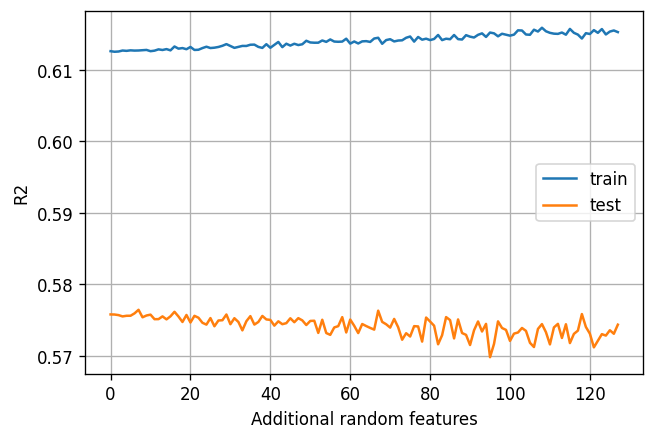

In [9]:
fig, ax = plt.subplots(dpi=120)
plt.plot(r2_train, label='train')
plt.plot(r2_test, label='test')
plt.xlabel("Additional random features")
plt.ylabel("R2")
plt.legend()
plt.grid()
plt.show()

In [10]:
pf = PolynomialFeatures(degree=2)
poly_X_train = pf.fit_transform(X_train)
poly_X_test = pf.fit_transform(X_test)

selector = RFECV(estimator=LinearRegression(), step=1, cv=10, scoring='r2')

selector.fit(poly_X_train, y_train)

n_features = selector.n_features_
print(f"Features reduced to {n_features} from {poly_X_train.shape[1]}")

r2_train = selector.score(poly_X_train, y_train)
r2_test = selector.score(poly_X_test, y_test)
print(f"\nR2 train:\t{r2_train:.3}")
print(f"R2 test:\t{r2_test:.3}")

Features reduced to 4 from 45

R2 train:	0.588
R2 test:	0.572


In [11]:
warnings.filterwarnings('ignore')

l2_lm = RidgeCV(alphas=np.logspace(-3, 2, num=6), normalize=True, cv=5, scoring='r2')
l2_lm.fit(X_train, y_train)

best_alpha = l2_lm.alpha_
r2_test = l2_lm.score(X_test, y_test)

print(f"Best alpha:\t{best_alpha}")
print(f"Test R2:\t{r2_test:.3}\n")
for var, coef in zip(X_train.columns, l2_lm.coef_):
    print(f"{var}: \t{coef:+.3}")

Best alpha:	0.001
Test R2:	0.576

MedInc: 	+0.851
HouseAge: 	+0.124
AveRooms: 	-0.302
AveBedrms: 	+0.367
Population: 	-0.00189
AveOccup: 	-0.0367
Latitude: 	-0.884
Longitude: 	-0.856


In [12]:
l1_lm = LassoCV(alphas=np.logspace(-3, 2, num=6), normalize=True, cv=5)
l1_lm.fit(X_train, y_train)

best_alpha = l1_lm.alpha_
r2_test = l1_lm.score(X_test, y_test)

print(f"Best alpha:\t{best_alpha}")
print(f"Test R2:\t{r2_test:.3}\n")
for var, coef in zip(X_train.columns, l1_lm.coef_):
    print(f"{var}: \t{coef:+.3}")

Best alpha:	0.001
Test R2:	0.469

MedInc: 	+0.677
HouseAge: 	+0.074
AveRooms: 	-0.0
AveBedrms: 	-0.0
Population: 	-0.0
AveOccup: 	-0.0
Latitude: 	-0.0
Longitude: 	-0.0


## Stochastic gradient descent

Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11
Epoch: 12
Epoch: 13
Epoch: 14
Epoch: 15
Epoch: 16
Epoch: 17
Epoch: 18
Epoch: 19
Epoch: 20
Epoch: 21
Epoch: 22
Epoch: 23
Epoch: 24
Epoch: 25
Epoch: 26
Epoch: 27
Epoch: 28
Epoch: 29
Epoch: 30


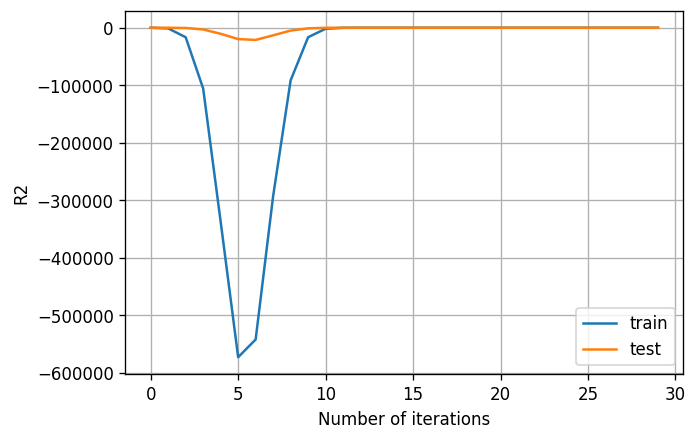

In [13]:
SGD = SGDRegressor(penalty='l2', learning_rate='invscaling', eta0=0.01, power_t=0.25)

r2_train = []
r2_test = []

for i in range(30):
    print("Epoch:", i+1)
    for j in range(len(X_train)):
        SGD.partial_fit(X_train.iloc[[j],:], y_train[[j]])
    r2_train.append(SGD.score(X_train, y_train))
    r2_test.append(SGD.score(X_test, y_test))

fig, ax = plt.subplots(dpi=120)
plt.plot(r2_train, label='train')
plt.plot(r2_test, label='test')
plt.xlabel("Number of iterations")
plt.ylabel("R2")
plt.legend()
plt.grid()
plt.show()